# 03. 신경망

## 1. 신경망   
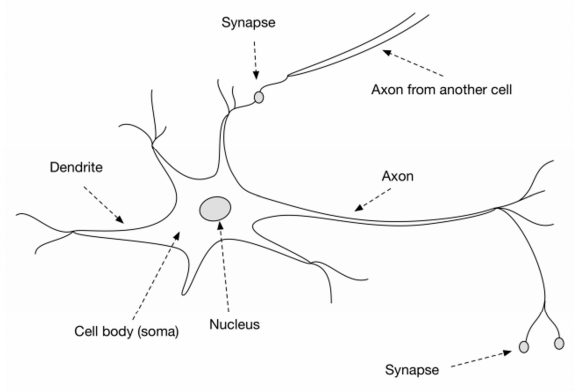   

- Dendrite : 수상돌기   
- Axon : 축삭돌기   
- Synapse : 시냅스, 세포와 세포 사이 약간의 공간   

Synapse를 통해 세포들이 무언가는 주고 받지만 중요한 것만 전달하고, 모두 전달하지 않는다.

## 2. 뉴런 모델   
- 사람의 신경세포(Neuron, 뉴런) 역할을 하는 AI 신경세포(Node, 노드)를 만들자   
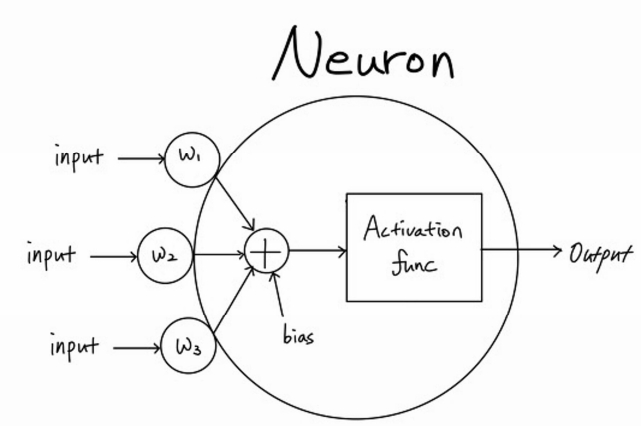

- 뉴런(node)으로의 입력 :  x1, x2, x3, ⋯, xn (feature)
- 각 입력에 대응하는 가중치 :  w1, w2, w3, ⋯, wn (weight)
- 각 입력에 대한 가중치 곱 : xw
- 각 입력과 가중치의 갯수가 n개 라고 하면 다음과 같이 일반화 가능 
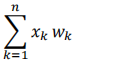


dendrite에서 input   
w :  가중치   
Activation func : sigmoid   
|   
{(input1 * w1) + (input2 * w2) + ... + (inputn * wn)} + bias   
Activation func을 거치면 0 < output < 1   


## 3. 단일 신경망 구축
- 딥러닝에서 가중치와 bias는 임의의 수로 설정 후 학습하는 과정에서 갱신함   
(DL에서 weight와 bias는 초기에 임의로 설정됨)
- 이번 예제는 가중치와 bias를 고정하고, 이 값들이 실제 신경망에서 어떤 의미인지를 확인
- 입력으로 단 두개의 값(feature) x1, x2
- 활성화함수로 시그모이드 함수(0 < y < 1) 사용

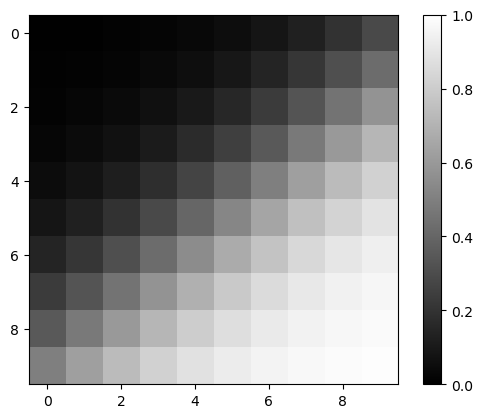

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값
X1 = np.arange(-1.0, 1.0, 0.2) # 원소 수 10개
X2 = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
Z = np.zeros((10,10))

# x1, x2 값의 입력 가중치
w_x1 = 2.5
w_x2 = 3.0

# 편향
bias = 0.1

# 그리드맵의 각 그리드별 뉴런의 연산
# range(10) : 0~9 숫자 리스트
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱들의 합 + 편향
        u = X1[i]*w_x1 + X2[j]*w_x2 + bias
        
        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)) # 시그모이드 함수에 u 대입
        Z[j][i] = y

# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar() 
plt.show()

- numpy의 ndarray를 이용한 행렬연산

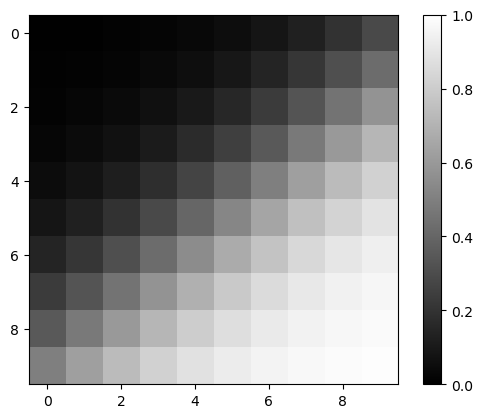

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# x1, x2 값
X1 = np.arange(-1.0, 1.0, 0.2) # 원소 수 10개
X2 = np.arange(-1.0, 1.0, 0.2)

# 출력값을 저장할 10x10 그리드
Z = np.zeros((10,10))

# x, y 값의 입력 가중치
W = np.array([2.5,3.0])

# 편향
bias = np.array([0.1])

# 그리드맵의 각 그리드별 뉴런의 연산
for i in range(10):
    for j in range(10):
        # 입력과 가중치 곱들의 합 + 편향
        list1 = [X1[i], X2[j]]
        X = np.array(list1)
        u = np.dot(X, W.T) + bias  # np.dot; 행렬곱
        
        # 그리드맵에 출력 값 저장
        y = 1/(1+np.exp(-u)) # 시그모이드 함수
        Z[j][i] = y
        
# 그리드맵 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar() 
plt.show()

모든 입력 feature는 node를 만드는데 기여   
출력을 n개 하려면    
입력 feature M 1m   
가중치 weight mn   
bias n

## 4. 다중 신경망

### Fully Connected Layer(Fully Connected Network)   
fc1, fc2, ...로 흔히 표현함
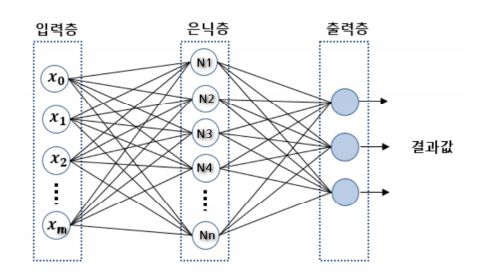

- 지금부터 구현하는 신경망을 Input Layer 입력 2개, Hidden Layer 노드 2개, Output Layer 노드 1개   
출력이 하나라는 것은 **회귀**를 위한 신경망을 의미(집값, 주식 예측 등)
- Hiddel Layer 활성화 함수는 시그모이드, Output Layer 활성화 함수는 항등함수

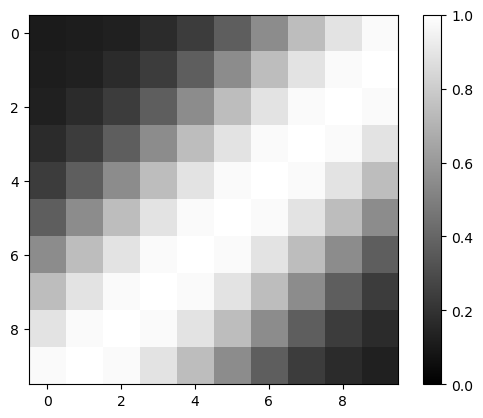

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# x, y 값
X = np.arange(-1.0, 1.0, 0.2) # 원소 10개
Y = np.arange(-1.0, 1.0, 0.2)

# 출력을 저장하는 10X10 그리드
Z = np.zeros((10,10))

# 가중치
w_im = np.array([[4.0,4.0], [4.0,4.0]]) # 은닉층 2x2 행렬
w_mo = np.array([[1.0], [-1.0]]) # 출력층 2x1 행렬

# 편향
b_im = np.array([3.0,-3.0]) # 은닉층
b_mo = np.array([0.1]) # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # 시그모이드 함수
# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return u # 항등함수

# 그리드맵의 각 그리드별 신경망 연산
for i in range(10):
    for j in range(10):
        # 순전파
        inp = np.array([X[i], Y[j]]) # 입력층  1*2  (100가지를 살펴볼 예정)
        mid = middle_layer(inp, w_im, b_im) # 은닉층 2*2
        out = output_layer(mid, w_mo, b_mo) # 출력층 1*2
        # 그리드맵에 신경망 출력 값 저장
        Z[j][i] = out[0]
        
# 그리드맵으로 표시
plt.imshow(Z, "gray", vmin = 0.0, vmax = 1.0)
plt.colorbar() 
plt.show()

### 5. 분류
- Input Layer 입력 2개, Hidden Layer 노드 2개, Output Layer 노드 2개 
- Hiddel Layer 활성화 함수는 시그모이드, Output Layer 활성화 함수는 소프트맥스 사용

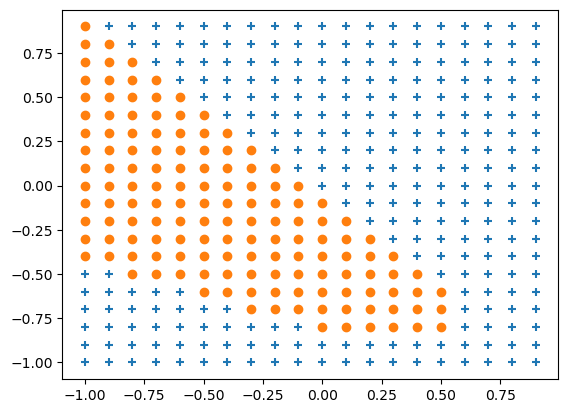

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# x, y 값
X = np.arange(-1.0, 1.0, 0.1) # 원소 수 20개
Y = np.arange(-1.0, 1.0, 0.1)

# 가중치
w_im = np.array([[1.0,2.0], [2.0,3.0]])   # 은닉층 2x2 행렬
w_mo = np.array([[-1.0,1.0], [1.0,-1.0]]) # 출력층 2x2 행렬

# 편향
b_im = np.array([0.3,-0.3]) # 은닉층
b_mo = np.array([0.4,0.1])  # 출력층

# 은닉층
def middle_layer(x, w, b):
    u = np.dot(x, w) + b
    return 1/(1+np.exp(-u)) # 시그모이드 함수
# 출력층
def output_layer(x, w, b):
    u = np.dot(x, w) + b
    return np.exp(u)/np.sum(np.exp(u)) # 소프트맥스 함수

# 분류 결과를 저장하는 리스트
x_1 = []
y_1 = []
x_2 = []
y_2 = []

# 그리드맵의 각 그리드별 신경망 연산
for i in range(20):
    for j in range(20):
        # 순전파(forward propogation)
        inp = np.array([X[i], Y[j]])
        mid = middle_layer(inp, w_im, b_im)
        out = output_layer(mid, w_mo, b_mo)

        # 확률의 크기를 비교해 분류함
        if out[0] > out[1]:
            x_1.append(X[i])
            y_1.append(Y[j])
        else:
            x_2.append(X[i])
            y_2.append(Y[j])
        
# 산포도 표시
plt.scatter(x_1, y_1, marker="+")
plt.scatter(x_2, y_2, marker="o")
plt.show()